In [1]:
pip install praw==3.5.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw
import sqlite3

conn=sqlite3.connect('reddit.db')
c=conn.cursor()
c.execute(''' DROP TABLE IF EXISTS topics''')
c.execute(''' DROP TABLE IF EXISTS comments''')
c.execute(''' CREATE TABLE topics
            (topicTitle text,topicText text, topicID text,topicCategory text)''')
c.execute(''' CREATE TABLE comments
                (commentText text,commentID text , topicTitle text,topicText text,topicID text,
                topicCategory text)''')

user_agent = "Introducing Data Science Book"
r = praw.Reddit(user_agent = user_agent)
subreddites = ['datascience','gameofthrones']
limit=1000


In [3]:
def prawGetData(limit,subredditName):
    topics = r.get_subreddit(subredditName).get_hot(limit=limit)
    
    commentInsert = []
    topicInsert = []
    topicNBR = 1
    for topic in topics:
        if (float(topicNBR)/limit)*100 in range(1,100):
            print ('*********** TOPIC:' + str(topic.id)+ ' *********COMPLETE: ' + str((float(topicNBR)/limit)*100)+ ' % ****')
        topicNBR += 1
        try:
            topicInsert.append((topic.title,topic.selftext,topic.id,subredditName))
        except:
            pass
        try:
            for comment in topic.comments:commentInsert.append((comment.body,comment.id,topic.title,topic.selftext,topic.id
                                                                ,subredditName))
        except:
            pass
        
        
    print ('********************************')
    print ('INSERTING DATA INTO SQLITE')
    c.executemany('INSERT INTO topics VALUES (?,?,?,?)', topicInsert)
    print ('INSERTED TOPICS')
    c.executemany('INSERT INTO comments VALUES (?,?,?,?,?,?)', commentInsert)
    print ('INSERTED COMMENTS')        
    conn.commit() 

In [4]:
for subject in subreddites:
 prawGetData(limit=limit,subredditName=subject)

*********** TOPIC:zl0vns *********COMPLETE: 1.0 % ****
*********** TOPIC:zl7q5w *********COMPLETE: 2.0 % ****
*********** TOPIC:zl1tzj *********COMPLETE: 3.0 % ****
*********** TOPIC:zl0xn6 *********COMPLETE: 4.0 % ****
*********** TOPIC:zk8v7j *********COMPLETE: 5.0 % ****
*********** TOPIC:zkhaks *********COMPLETE: 6.0 % ****
*********** TOPIC:zjlilc *********COMPLETE: 8.0 % ****
*********** TOPIC:zjysod *********COMPLETE: 9.0 % ****
*********** TOPIC:zj2srx *********COMPLETE: 10.0 % ****
*********** TOPIC:zj8p6s *********COMPLETE: 11.0 % ****
*********** TOPIC:zi8gbp *********COMPLETE: 12.0 % ****
*********** TOPIC:zi11jn *********COMPLETE: 13.0 % ****
*********** TOPIC:zhw2pe *********COMPLETE: 15.0 % ****
*********** TOPIC:zgxwoo *********COMPLETE: 16.0 % ****
*********** TOPIC:zh5das *********COMPLETE: 17.0 % ****
*********** TOPIC:zgnani *********COMPLETE: 18.0 % ****
*********** TOPIC:zge1wg *********COMPLETE: 19.0 % ****
*********** TOPIC:zgeznz *********COMPLETE: 20.0 % ****


*********** TOPIC:z1wzpm *********COMPLETE: 75.0 % ****
*********** TOPIC:z163ad *********COMPLETE: 76.0 % ****
*********** TOPIC:z1h6t8 *********COMPLETE: 77.0 % ****
*********** TOPIC:z10j8c *********COMPLETE: 78.0 % ****
*********** TOPIC:z1mwmp *********COMPLETE: 79.0 % ****
*********** TOPIC:z0hu9a *********COMPLETE: 80.0 % ****
*********** TOPIC:z03giv *********COMPLETE: 81.0 % ****
*********** TOPIC:z04r0s *********COMPLETE: 82.0 % ****
*********** TOPIC:yzkgws *********COMPLETE: 83.0 % ****
*********** TOPIC:yzxew1 *********COMPLETE: 84.0 % ****
*********** TOPIC:yzn7ef *********COMPLETE: 85.0 % ****
*********** TOPIC:yyxjs6 *********COMPLETE: 86.0 % ****
*********** TOPIC:yyoqv6 *********COMPLETE: 87.0 % ****
*********** TOPIC:yyx4dg *********COMPLETE: 88.0 % ****
*********** TOPIC:yysxn7 *********COMPLETE: 89.0 % ****
********************************
INSERTING DATA INTO SQLITE
INSERTED TOPICS
INSERTED COMMENTS


In [5]:
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jerry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

data preparation

In [7]:
conn=sqlite3.connect('reddit.db')
c=conn.cursor()

In [8]:
def wordFilter(excluded,wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered


stopwords = nltk.corpus.stopwords.words('english')


def lowerCaseArray(wordrow):
    lowercased =[word.lower() for word in wordrow]
    return lowercased

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
def data_processing(sql):
    c.execute(sql)
    data = {'wordMatrix':[],'all_words':[]}
    row = c.fetchone()
    
    while row is not None:
        wordrow = nltk.tokenize.word_tokenize(row[0]+ " " + row[1])
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
        data['all_words'].extend(wordrow_nostopwords)
        data['wordMatrix'].append(wordrow_nostopwords)
        row = c.fetchone()
    return data


subreddits = ['datascience','gameofthrones']
data = {}
for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT topicTitle,topicText,topicCategory FROM topics
            WHERE topicCategory = '''+"'"+subject+"'")

In [11]:
print (data['datascience']['wordMatrix'][0])

['weekly', 'entering', '&', 'transitioning', '-', 'thread', '12', 'dec', ',', '2022', '-', '19', 'dec', ',', '2022', 'welcome', 'week', "'s", 'entering', '&', 'transitioning', 'thread', '!', 'thread', 'questions', 'getting', 'started', ',', 'studying', ',', 'transitioning', 'data', 'science', 'field', '.', 'topics', 'include', ':', '*', 'learning', 'resources', '(', 'e.g', '.', 'books', ',', 'tutorials', ',', 'videos', ')', '*', 'traditional', 'education', '(', 'e.g', '.', 'schools', ',', 'degrees', ',', 'electives', ')', '*', 'alternative', 'education', '(', 'e.g', '.', 'online', 'courses', ',', 'bootcamps', ')', '*', 'job', 'search', 'questions', '(', 'e.g', '.', 'resumes', ',', 'applying', ',', 'career', 'prospects', ')', '*', 'elementary', 'questions', '(', 'e.g', '.', 'start', ',', 'next', ')', 'wait', 'answers', 'community', ',', 'check', '[', 'faq', ']', '(', 'https', ':', '//www.reddit.com/r/datascience/wiki/frequently-asked-questions', ')', 'resources', 'pages', 'wiki', '.', '

data exploration

<function matplotlib.pyplot.show(close=None, block=None)>

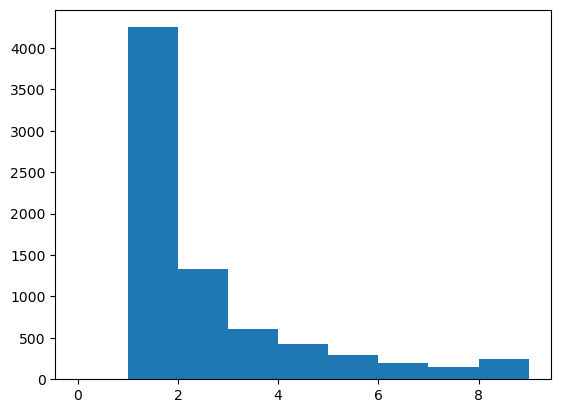

In [12]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(),bins=range(10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

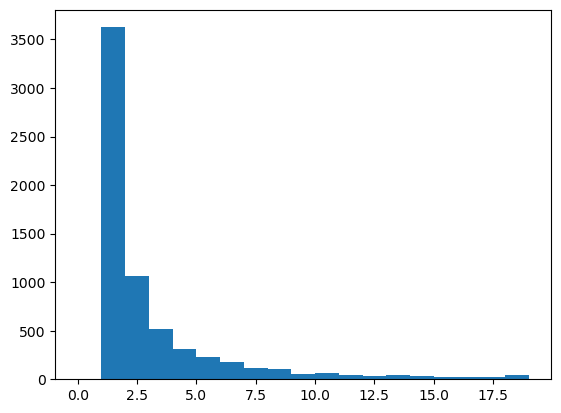

In [13]:
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(),bins=range(20))
plt.show

In [14]:
print (wordfreqs_cat1.hapaxes())

['straight-forward', 'contextual', 'bandits', 'usual', '3.8', 'gpa', 'govt', 'math/programming', 'proving', 'tableau/power', 'navigating', 'represented', '24hr', 'pass/fail', 'looks/does', 'accident', 'malfunction', 'equipment', 'rookie', 'notification', 'funnel', 'needed/a', 'mesh', 'methodically', 'chops', 'falling', 'despair', 'unassuming', 'probing', 'employer/manager', 'know/study', 'e.t.c.', 'fast-paced', 'capstone', 'roadsigns', 'edges', 'radeon', 'rx', '580', 'swapping', '65k/yr', 'prohibiting', 'raises', '140k/yr', 'ot', 'stick', 'phi', 'healthcare-related', 'arturo.ai', 'atrocious', 'forever', 'speciality', 'chief', 'officer', 'exec/leader/manager', 'math/stats', 'visibility', 'quicker/easier', 'succes', 'portofolio', 'register', 'stream', 'intersection', 'workstreams', 'ics', 'power/say', 'opens', 'laterally', 'cog', 'impact/grow', 'slog', 'obsession', 'wired', 'linkedin/', 'portray', 'disingenuous', 'midwest', 'ties', 'company…has', '\\~70', 'signs', 'continued', 'attainmen

In [15]:
print (wordfreqs_cat2.hapaxes())

['s.4', 'e.8', 'bloodhound', 'volume', 'utter', 'contempt', 'pledge', 'necessity', 'disquiet', 'epitomise', 'hardness', 'plotlines', 'baffles', 'adapt', '-arys', 'oakheart', '-areo', 'hotah', '-arianne', 'irons', '-victarion', '-aeron', '-jon', 'w/o', 'mance', 'rayder', 'rescuing', 'coldhands', '-jojen', '-barristan', '-blackfish', '-stannis', '-roose', '-mance', '-thoros', '-beric', '-alliser', '-theon', 'cleganebowl', 'central', 'versions', 'twitter', 'responded', '2013', 'parentage', 'glamorous', 'honourable', 'benjen', 'cerise', 'twyin', 'hugely', 'sourcing', 'mister', 'bible', 'outline', 'conan', 'stevens', 'thurmond', 'witches', 'finales', 'ranked', 'overshadowed', 'e.g', '7/8', 'plz', 'falcon', 'imagery', 'overshadows', 'scenery', 'moat', 'cailin', 'stronghold', 'ruins', 'fortify', 'cadet', 'lordship', 'flirting', 'brianne', 'camera', 'dialog', 'lookin', 'fellas', 'daily', 'routine', 'necessarily', 'introduce', 'a.', 'canon', 'legends', 'incentive', 'endeavor', 'abandoning', 'ar

In [16]:
print (wordfreqs_cat1.most_common(20))

[('.', 3900), (',', 3540), ('data', 1603), ('?', 1462), (')', 991), ('(', 952), (':', 662), ('*', 607), ('’', 599), ('science', 555), ("'m", 439), ('would', 438), ('like', 369), ("n't", 332), ('work', 319), ("'s", 310), ('job', 307), ('&', 276), ('get', 265), ('!', 264)]


In [17]:
print (wordfreqs_cat2.most_common(20))

[('.', 2575), (',', 2110), ('?', 861), ('’', 605), ('*', 419), (')', 342), ('would', 328), ('(', 307), ("'s", 303), ('jon', 296), (':', 268), ('season', 243), ('got', 236), ('show', 224), ('like', 224), ("n't", 213), ('king', 200), ('!', 172), ('think', 171), ('one', 158)]


In [18]:
stemmer = nltk.SnowballStemmer("english")
def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed


manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']',
                    '=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10',
                    '--',"''",';','-',':','?',"'",'"','’','://','https']



def data_processing(sql,manual_stopwords):
    c.execute(sql)
    data = {'wordMatrix':[],'all_words':[]}
    interWordMatrix = []
    interWordList = []
    
    row = c.fetchone()
    while row is not None:
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|[^\w\s]+')
        
        
        wordrow = tokenizer.tokenize(row[0]+" "+row[1])
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
        wordrow_nostopwords =wordFilter(manual_stopwords,wordrow_nostopwords)
        wordrow_stemmed = wordStemmer(wordrow_nostopwords)
        interWordList.extend(wordrow_stemmed)
        interWordMatrix.append(wordrow_stemmed)
        row = c.fetchone()
        
    wordfreqs = nltk.FreqDist(interWordList) 
    hapaxes = wordfreqs.hapaxes()
    for wordvector in interWordMatrix:
        wordvector_nohapexes = wordFilter(hapaxes,wordvector)
        data['wordMatrix'].append(wordvector_nohapexes)
        data['all_words'].extend(wordvector_nohapexes)
    return data

for subject in subreddits:
    data[subject] = data_processing(sql='''SELECT
    topicTitle,topicText,topicCategory FROM topics
    WHERE topicCategory = '''+"'"+subject+"'",
    manual_stopwords=manual_stopwords)        

In [19]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
print (wordfreqs_cat1.most_common(20))

[('data', 1667), ('scienc', 588), ('work', 558), ('use', 463), ('would', 430), ('like', 401), ('job', 398), ('get', 364), ('learn', 334), ('want', 334), ('model', 326), ('time', 292), ('project', 272), ('look', 254), ('year', 247), ('experi', 241), ('scientist', 235), ('compani', 235), ('know', 233), ('help', 223)]


In [20]:
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
print (wordfreqs_cat2.most_common(20))

[('would', 315), ('jon', 305), ('season', 299), ('king', 264), ('show', 261), ('like', 247), ('got', 239), ('throne', 224), ('watch', 206), ('book', 199), ('think', 199), ('dragon', 181), ('charact', 173), ('time', 173), ('night', 168), ('one', 165), ('know', 165), ('game', 160), ('end', 155), ('peopl', 151)]


In [37]:
holdoutLength = 100
labeled_data1 = [(word,'datascience') for word in
    data['datascience']['wordMatrix'][holdoutLength:]]
labeled_data2 = [(word,'gameofthrones') for word in
    data['gameofthrones']['wordMatrix'][holdoutLength:]]
labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)

holdout_data = data['datascience']['wordMatrix'][:holdoutLength]
holdout_data.extend(data['gameofthrones']['wordMatrix'][:holdoutLength])
holdout_data_labels = ([('datascience')
for _ in range(holdoutLength)] + [('gameofthrones') for _ in
    range(holdoutLength)])

data['datascience']['all_words_dedup'] =list(OrderedDict.fromkeys(data['datascience']['all_words']))
data['gameofthrones']['all_words_dedup'] =list(OrderedDict.fromkeys(data['gameofthrones']['all_words']))
all_words = []
all_words.extend(data['datascience']['all_words_dedup'])
all_words.extend(data['gameofthrones']['all_words_dedup'])
all_words_dedup = list(OrderedDict.fromkeys(all_words)) 

prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0])for word in all_words_dedup}) for x in holdout_data] 
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.75)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

# list index out of range if use holdout_data
# change to holdout_data_labels but not sure


In [38]:
print (prepared_data[0])

({'week': False, 'enter': False, 'transit': False, 'thread': False, '12': False, 'dec': False, '2022': False, '19': False, 'welcom': False, 'question': False, 'get': False, 'start': False, 'studi': False, 'data': False, 'scienc': False, 'field': False, 'topic': False, 'includ': False, 'learn': False, 'resourc': False, 'e': False, 'g': False, 'book': False, 'tutori': False, 'video': False, 'tradit': False, 'educ': False, 'school': False, 'degre': False, 'elect': False, 'altern': False, 'onlin': False, 'cours': False, 'bootcamp': False, 'job': False, 'search': False, 'resum': False, 'appli': False, 'career': False, 'prospect': False, 'elementari': False, 'next': False, 'wait': False, 'answer': False, 'communiti': False, 'check': False, 'faq': False, '](': False, 'www': False, 'reddit': False, 'com': False, 'datasci': False, 'wiki': False, 'frequent': False, 'ask': False, 'page': False, 'also': False, 'past': False, 'q': False, '20thread': False, 'restrict_sr': False, 'sort': False, 'new'

In [39]:
classifier = nltk.NaiveBayesClassifier.train(train)
print(nltk.classify.accuracy(classifier, test))
classified_data = classifier.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print (cm)

0.926208651399491
              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |  <.>100 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [40]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                   engin = True           datasc : gameof =     46.5 : 1.0
                  master = True           datasc : gameof =     32.4 : 1.0
                 product = True           datasc : gameof =     31.1 : 1.0
                   advic = True           datasc : gameof =     30.4 : 1.0
                 analysi = True           datasc : gameof =     30.4 : 1.0
                    busi = True           datasc : gameof =     30.4 : 1.0
                    tool = True           datasc : gameof =     29.8 : 1.0
                    valu = True           datasc : gameof =     22.4 : 1.0
                    game = True           gameof : datasc =     22.4 : 1.0
                 compani = True           datasc : gameof =     18.2 : 1.0
                   learn = True           datasc : gameof =     17.9 : 1.0
                research = True           datasc : gameof =     17.7 : 1.0
                  experi = True           datasc : gameof =     17.4 : 1.0

In [25]:
#Decision tree model training and evaluation

In [26]:
classifier2 = nltk.DecisionTreeClassifier.train(train)
print(nltk.classify.accuracy(classifier2, test))
classified_data2 = classifier2.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)
print (cm)

0.9338422391857506
              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience | <15> 85 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [27]:
print(classifier2.pseudocode(depth=4))

if data == False: 
  if use == False: 
    if work == False: 
      if ds == False: return 'gameofthrones'
      if ds == True: return 'datascience'
    if work == True: 
      if show == False: return 'datascience'
      if show == True: return 'gameofthrones'
  if use == True: 
    if got == False: 
      if dragon == False: return 'datascience'
      if dragon == True: return 'gameofthrones'
    if got == True: 
      if access == False: return 'gameofthrones'
      if access == True: return 'datascience'
if data == True: return 'datascience'

